<a href="https://colab.research.google.com/github/adarsharegmi/NetCDF-task/blob/main/film_permits_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 

os.listdir()

['.config', 'film-permits.csv', 'sample_data']

In [2]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# question 1
- numerical and visual Analysis of duration of filming
then;
- split by borough
- split by category of production

In [3]:
#read in data
film_permits = pd.read_csv('film-permits.csv',header=0,usecols=(1,2,3,6,8,9,11),names=['start_time','end_time','submitted_on','borough','police_precinct','category','country'],engine='python')
film_permits.head()

,start_time,end_time,submitted_on,borough,police_precinct,category,country
43547,2012-01-10T07:00:00,2012-01-10T19:00:00,2012-01-04T12:25:37,EAGLE STREET between FRANKLIN STREET and WEST ...,"1, 2","108, 94",Episode series
43997,2012-01-19T07:00:00,2012-02-20T22:00:00,2012-01-09T18:22:29,Manhatan,18,Theater,United States of America
43675,2012-01-09T07:00:00,2012-01-09T20:00:00,2012-01-05T13:03:51,Manhatan,"5, 7",Still Photography,United States of America
44536,2012-01-23T07:00:00,2012-01-23T21:00:00,2012-01-18T12:08:17,Manhatan,"18, 20",Television,United States of America
44061,2012-01-18T06:00:00,2012-01-18T21:00:00,2012-01-10T14:57:29,Brooklyn,90,Commercial,United States of America


In [4]:
# convert to start & end to datetime
film_permits['start_time'] = pd.to_datetime(film_permits.start_time)
film_permits['end_time'] = pd.to_datetime(film_permits.end_time)

In [5]:
# create a duration variable by subtracting the start-time from end-time
duration = film_permits.end_time - film_permits.start_time
film_permits['duration'] =duration
film_permits

,start_time,end_time,submitted_on,borough,police_precinct,category,country,duration
43547,2012-01-10 07:00:00,2012-01-10 19:00:00,2012-01-04T12:25:37,EAGLE STREET between FRANKLIN STREET and WEST ...,"1, 2","108, 94",Episode series,0 days 12:00:00
43997,2012-01-19 07:00:00,2012-02-20 22:00:00,2012-01-09T18:22:29,Manhatan,18,Theater,United States of America,32 days 15:00:00
43675,2012-01-09 07:00:00,2012-01-09 20:00:00,2012-01-05T13:03:51,Manhatan,"5, 7",Still Photography,United States of America,0 days 13:00:00
44536,2012-01-23 07:00:00,2012-01-23 21:00:00,2012-01-18T12:08:17,Manhatan,"18, 20",Television,United States of America,0 days 14:00:00
44061,2012-01-18 06:00:00,2012-01-18 21:00:00,2012-01-10T14:57:29,Brooklyn,90,Commercial,United States of America,0 days 15:00:00
...,...,...,...,...,...,...,...,...
265845,2016-02-04 09:00:00,2016-02-05 01:00:00,2016-02-01T15:56:09,Brooklyn,"90, 94",Television,United States of America,0 days 16:00:00
296880,2016-06-29 10:30:00,2016-06-30 04:00:00,2016-06-24T13:50:41,Brooklyn,94,Television,United States of America,0 days 17:30:00
428965,2018-07-05 08:00:00,2018-07-05 22:00:00,2018-07-03T09:53:23,Brooklyn,"111, 94",Television,United States of America,0 days 14:00:00
368960,2017-08-09 09:30:00,2017-08-09 23:30:00,2017-08-04T09:37:34,Manhatan,"19, 20, 24",Television,United States of America,0 days 14:00:00


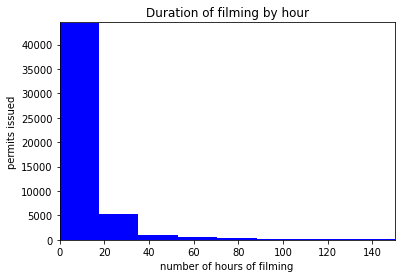

In [6]:
# plot a histogram of duration of filming by the number of permits issued
# this doesn't represent the data well so I will also do a truncated histogram by hours

n, bins, patches = plt.hist(film_permits['duration'].astype('timedelta64[h]'),bins=200,facecolor='blue')

max_y = max(n) + 100
max_x = max(film_permits)

plt.axis([0, 150, 0, max_y])

plt.title("Duration of filming by hour")
plt.xlabel("number of hours of filming")
plt.ylabel("permits issued")

plt.show()


In [7]:
categories  = list(film_permits['category'].unique()) 
print(categories)
# since 108 94 is invalid category removing the row.
film_permits.drop(film_permits[film_permits['category'] == '108, 94'].index, inplace = True)

['108, 94', 'Theater', 'Still Photography', 'Television', 'Commercial', 'Film', 'Student', 'WEB', 'Documentary', 'Music Video', 'Red Carpet/Premiere']


In [8]:
categories = categories[1:-1]

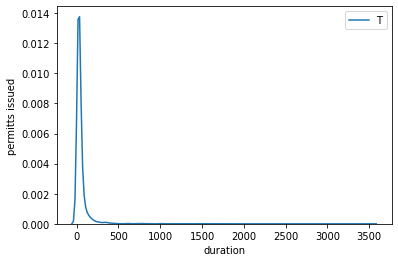

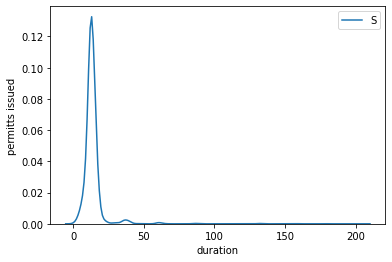

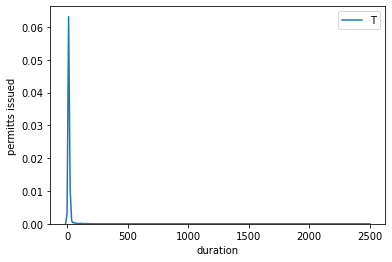

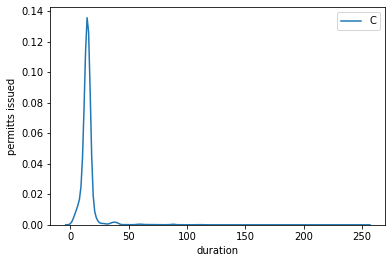

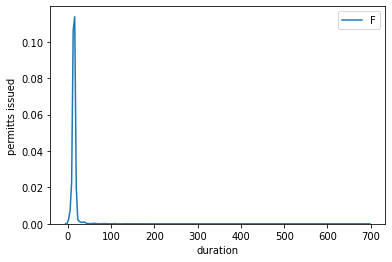

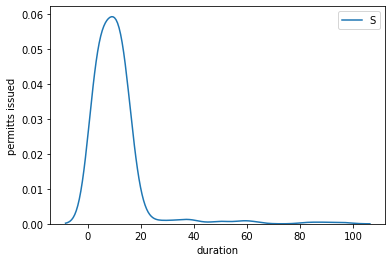

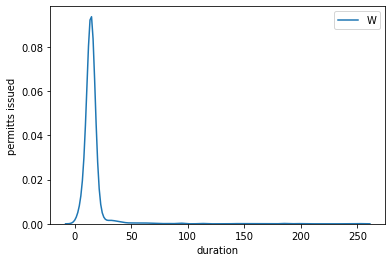

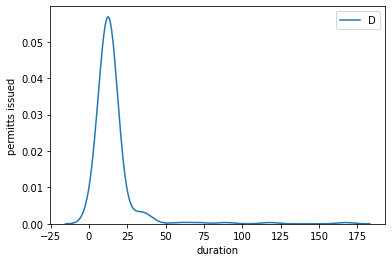

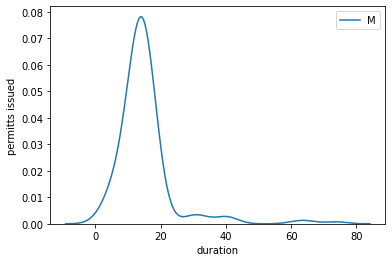

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = film_permits
for i in categories:
  sns.kdeplot(df.duration[df.category == i].astype('timedelta64[h]'),label=i);

  # # beautifying the labels
  plt.xlabel('duration')
  plt.ylabel('permitts issued')
  plt.legend(i)
  plt.show()


In [10]:
# group duration by category

duration_category = film_permits.groupby('category').size().sort_values(ascending=False)
duration_category

category
Television             28135
Film                    9072
Theater                 4925
Commercial              4391
Still Photography       3294
WEB                     1813
Student                  341
Documentary              211
Music Video              166
Red Carpet/Premiere        1
dtype: int64

In [11]:
# group duration by borough

duration_borough = film_permits.groupby('borough').size().sort_values(ascending=False)
duration_borough

borough
Manhatan         26226
Brooklyn         15886
Queens            8104
Bronx             1473
Staten Island      660
dtype: int64

# question 2
- numerical and visual analysis of category of production
then;
- broken down by country

In [12]:
category_series  = film_permits['category']

# checking the category column
category_series.describe()

count          52349
unique            10
top       Television
freq           28135
Name: category, dtype: object

In [13]:
#groupby category

film_permits.groupby('category').groups

{'Commercial': [44061, 44414, 44191, 44019, 44526, 43497, 44005, 44325, 44620, 44008, 44622, 44294, 44046, 43958, 43413, 44060, 43756, 43769, 44297, 43648, 44416, 44091, 44207, 44564, 44045, 44445, 44322, 44121, 44534, 43730, 44216, 43595, 43959, 184503, 106676, 266092, 56701, 134429, 119910, 69645, 274916, 75502, 90906, 240497, 140615, 172392, 157542, 87828, 112802, 108280, 49631, 81346, 196262, 65419, 239764, 101762, 75511, 90024, 70581, 199387, 102731, 110572, 48809, 145117, 74791, 70719, 294627, 122274, 230938, 176739, 71198, 286354, 193917, 217009, 273277, 225518, 272537, 70969, 246738, 91331, 53514, 72274, 238654, 240024, 50247, 124497, 79434, 115784, 76069, 67444, 265282, 91875, 121916, 119530, 83842, 232794, 237923, 147824, 295411, 229262, ...], 'Documentary': [203700, 73029, 200774, 99483, 186660, 134684, 215415, 141443, 235592, 204425, 108624, 116115, 87035, 192997, 120743, 212101, 158091, 133109, 142207, 85442, 195945, 116703, 115268, 246324, 108625, 70440, 62967, 45480, 113

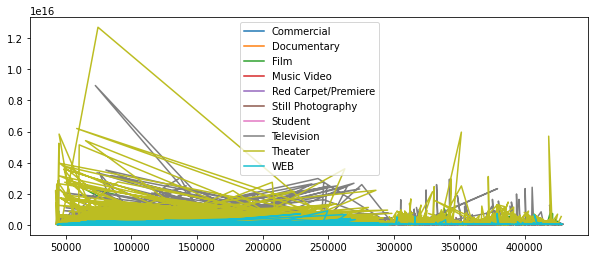

In [14]:
#plotting the data

fig, ax = plt.subplots(figsize=(10,4))
for key, grp in df.groupby(['category']):
    ax.plot(grp['duration'], label=key)

ax.legend()
plt.show()

In [15]:
# grouping by category broken down with country
film_permits.groupby(['category','country']).groups

{('Commercial', 'Canada'): [112992, 112677, 112685, 323680], ('Commercial', 'United Kingdom'): [58328, 233238, 232622, 232620, 232835, 58396, 58384, 120349, 355763], ('Commercial', 'United States of America'): [44061, 44414, 44191, 44019, 44526, 43497, 44005, 44325, 44620, 44008, 44622, 44294, 44046, 43958, 43413, 44060, 43756, 43769, 44297, 43648, 44416, 44091, 44207, 44564, 44045, 44445, 44322, 44121, 44534, 43730, 44216, 43595, 43959, 184503, 106676, 266092, 56701, 134429, 119910, 69645, 274916, 75502, 90906, 240497, 140615, 172392, 157542, 87828, 112802, 108280, 49631, 81346, 196262, 65419, 239764, 101762, 75511, 90024, 70581, 199387, 102731, 110572, 48809, 145117, 74791, 70719, 294627, 122274, 230938, 176739, 71198, 286354, 193917, 217009, 273277, 225518, 272537, 70969, 246738, 91331, 53514, 72274, 238654, 240024, 50247, 124497, 79434, 115784, 76069, 67444, 265282, 91875, 121916, 119530, 83842, 232794, 237923, 147824, 295411, 229262, ...], ('Documentary', 'United Kingdom'): [35114

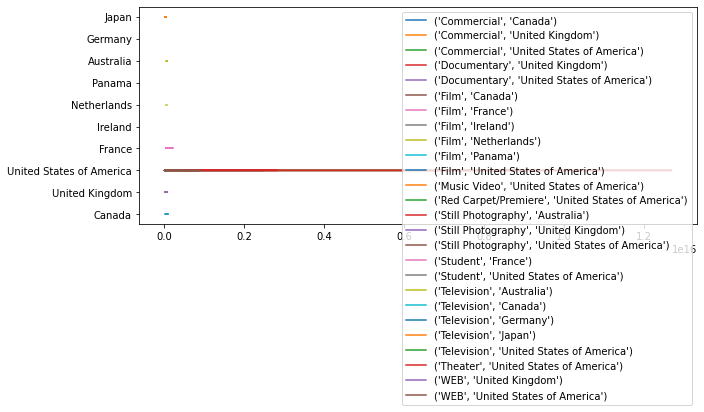

In [16]:
# plotting the data 

fig, ax = plt.subplots(figsize=(10,4))
for key, grp in df.groupby(['category','country']):
    ax.plot(grp['duration'],grp['country'],label=key)

ax.legend()
plt.show()

category             country                 
Commercial           Canada                      AxesSubplot(0.125,0.125;0.775x0.755)
                     United Kingdom              AxesSubplot(0.125,0.125;0.775x0.755)
                     United States of America    AxesSubplot(0.125,0.125;0.775x0.755)
Documentary          United Kingdom              AxesSubplot(0.125,0.125;0.775x0.755)
                     United States of America    AxesSubplot(0.125,0.125;0.775x0.755)
Film                 Canada                      AxesSubplot(0.125,0.125;0.775x0.755)
                     France                      AxesSubplot(0.125,0.125;0.775x0.755)
                     Ireland                     AxesSubplot(0.125,0.125;0.775x0.755)
                     Netherlands                 AxesSubplot(0.125,0.125;0.775x0.755)
                     Panama                      AxesSubplot(0.125,0.125;0.775x0.755)
                     United States of America    AxesSubplot(0.125,0.125;0.775x0.755)
Music Vi

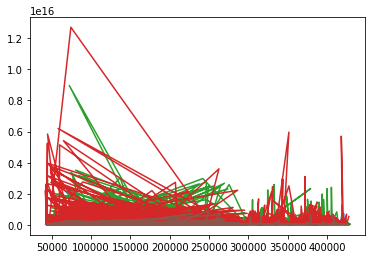

In [17]:
# plotting the data grouped using category and country 

df.groupby(['category','country'])['duration'].plot(legend=False)
# set legend = True to check values

# question 3
- numerical and visual analysis of category of production
then;
- broken down by police precinct
If there are more than one precinct registered for a category, then each precinct gets a count in this category.

In [18]:
# grouping by category broken down with country

film_permits.groupby(['category','police_precinct']).groups


{('Theater', '18'): [43997, 44528, 43183, 44531, 44530, 43178, 43257, 42926, 42781, 42737, 44241, 43253, 42780, 44396, 43912, 44481, 44397, 43577, 44604, 44395, 130868, 87423, 82347, 136031, 105380, 186421, 55251, 75964, 282712, 204253, 124004, 207387, 210099, 196497, 196162, 173949, 210591, 97381, 237600, 186741, 49254, 132647, 71687, 287653, 120836, 119593, 173270, 179390, 250516, 223240, 73809, 182936, 250498, 102107, 282680, 182926, 154782, 123542, 125304, 55265, 256636, 113652, 179393, 55350, 232337, 245173, 246610, 256641, 186419, 182934, 75985, 286465, 55235, 61949, 182460, 252553, 152861, 213351, 265237, 131170, 237621, 163665, 140745, 96149, 75996, 247099, 290287, 97410, 123562, 45594, 52093, 283460, 138851, 172750, 46332, 167193, 122977, 48431, 195284, 55360, ...], ('Still Photography', '5, 7'): [43675, 287207, 122892, 115111, 184708, 132910, 259332, 227767, 174060, 139837, 132896, 227143, 185734, 79301, 294351, 65397, 184729, 326472, 341876, 342811, 352491, 412090, 414068, 4

In [19]:
# grouping by police_precinct and filtering out those values less than 1

s = film_permits[film_permits['category']=='Film'].groupby(['police_precinct',]).groups
s = {x: count for x, count in s.items() if np.all(count > 1)}
print(s)

{'0, 10, 18': Int64Index([77714], dtype='int64'), '0, 111': Int64Index([68425], dtype='int64'), '0, 6, 61': Int64Index([126317], dtype='int64'), '1': Int64Index([224672, 126772, 300094, 125750, 213543,  90565, 121782, 256287,
             95064, 217258,
            ...
            423596, 426704, 427104, 427285, 427295, 428292, 427489, 428273,
            428022, 428776],
           dtype='int64', length=380), '1, 10': Int64Index([78413, 103396, 345754], dtype='int64'), '1, 10, 13, 14, 17, 72': Int64Index([220588], dtype='int64'), '1, 10, 13, 14, 5, 6': Int64Index([70777], dtype='int64'), '1, 10, 13, 14, 6': Int64Index([297992], dtype='int64'), '1, 10, 13, 5': Int64Index([123429], dtype='int64'), '1, 10, 13, 5, 6, 9': Int64Index([425736], dtype='int64'), '1, 10, 5, 6, 9': Int64Index([382301], dtype='int64'), '1, 10, 6': Int64Index([111380, 104038, 128949, 358230], dtype='int64'), '1, 10, 6, 9': Int64Index([385158], dtype='int64'), '1, 10, 9': Int64Index([378317], dtype='int64'), '1, 10

# question 4
- numerical and visual nalysis of lead time (duration between permit submission and start time)
then;
- broken down by duration of filming
- broken down by borough

In [20]:
# calculating the lead time based upon the question

df['lead_time'] = pd.to_datetime(film_permits.start_time) - pd.to_datetime(film_permits.submitted_on)
df

,start_time,end_time,submitted_on,borough,police_precinct,category,country,duration,lead_time
43997,2012-01-19 07:00:00,2012-02-20 22:00:00,2012-01-09T18:22:29,Manhatan,18,Theater,United States of America,32 days 15:00:00,9 days 12:37:31
43675,2012-01-09 07:00:00,2012-01-09 20:00:00,2012-01-05T13:03:51,Manhatan,"5, 7",Still Photography,United States of America,0 days 13:00:00,3 days 17:56:09
44536,2012-01-23 07:00:00,2012-01-23 21:00:00,2012-01-18T12:08:17,Manhatan,"18, 20",Television,United States of America,0 days 14:00:00,4 days 18:51:43
44061,2012-01-18 06:00:00,2012-01-18 21:00:00,2012-01-10T14:57:29,Brooklyn,90,Commercial,United States of America,0 days 15:00:00,7 days 15:02:31
43771,2012-01-20 00:01:00,2012-01-21 06:00:00,2012-01-06T09:44:37,Manhatan,1,Theater,United States of America,1 days 05:59:00,13 days 14:16:23
...,...,...,...,...,...,...,...,...,...
265845,2016-02-04 09:00:00,2016-02-05 01:00:00,2016-02-01T15:56:09,Brooklyn,"90, 94",Television,United States of America,0 days 16:00:00,2 days 17:03:51
296880,2016-06-29 10:30:00,2016-06-30 04:00:00,2016-06-24T13:50:41,Brooklyn,94,Television,United States of America,0 days 17:30:00,4 days 20:39:19
428965,2018-07-05 08:00:00,2018-07-05 22:00:00,2018-07-03T09:53:23,Brooklyn,"111, 94",Television,United States of America,0 days 14:00:00,1 days 22:06:37
368960,2017-08-09 09:30:00,2017-08-09 23:30:00,2017-08-04T09:37:34,Manhatan,"19, 20, 24",Television,United States of America,0 days 14:00:00,4 days 23:52:26


In [21]:
# using describe

df['lead_time'].describe()

count                        52349
mean     5 days 09:41:23.862117709
std      7 days 09:43:15.277805904
min              -2 days +20:33:43
25%                2 days 01:33:34
50%                3 days 18:21:32
75%                5 days 16:45:39
max              239 days 18:11:12
Name: lead_time, dtype: object

In [22]:
# slicing the data

updated_df = df[['lead_time','duration']]
updated_df

,lead_time,duration
43997,9 days 12:37:31,32 days 15:00:00
43675,3 days 17:56:09,0 days 13:00:00
44536,4 days 18:51:43,0 days 14:00:00
44061,7 days 15:02:31,0 days 15:00:00
43771,13 days 14:16:23,1 days 05:59:00
...,...,...
265845,2 days 17:03:51,0 days 16:00:00
296880,4 days 20:39:19,0 days 17:30:00
428965,1 days 22:06:37,0 days 14:00:00
368960,4 days 23:52:26,0 days 14:00:00


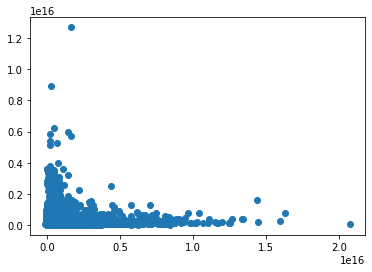

In [23]:
# scatter plot is easier and simple method to check linear dependency between the column

plt.scatter(updated_df['lead_time'], updated_df['duration'])
plt.show()

In [24]:
# after visuallizing the trend seen in scatter plot it is obvious there doesnot exists linear relationship between
# lead time and duration

df 

,start_time,end_time,submitted_on,borough,police_precinct,category,country,duration,lead_time
43997,2012-01-19 07:00:00,2012-02-20 22:00:00,2012-01-09T18:22:29,Manhatan,18,Theater,United States of America,32 days 15:00:00,9 days 12:37:31
43675,2012-01-09 07:00:00,2012-01-09 20:00:00,2012-01-05T13:03:51,Manhatan,"5, 7",Still Photography,United States of America,0 days 13:00:00,3 days 17:56:09
44536,2012-01-23 07:00:00,2012-01-23 21:00:00,2012-01-18T12:08:17,Manhatan,"18, 20",Television,United States of America,0 days 14:00:00,4 days 18:51:43
44061,2012-01-18 06:00:00,2012-01-18 21:00:00,2012-01-10T14:57:29,Brooklyn,90,Commercial,United States of America,0 days 15:00:00,7 days 15:02:31
43771,2012-01-20 00:01:00,2012-01-21 06:00:00,2012-01-06T09:44:37,Manhatan,1,Theater,United States of America,1 days 05:59:00,13 days 14:16:23
...,...,...,...,...,...,...,...,...,...
265845,2016-02-04 09:00:00,2016-02-05 01:00:00,2016-02-01T15:56:09,Brooklyn,"90, 94",Television,United States of America,0 days 16:00:00,2 days 17:03:51
296880,2016-06-29 10:30:00,2016-06-30 04:00:00,2016-06-24T13:50:41,Brooklyn,94,Television,United States of America,0 days 17:30:00,4 days 20:39:19
428965,2018-07-05 08:00:00,2018-07-05 22:00:00,2018-07-03T09:53:23,Brooklyn,"111, 94",Television,United States of America,0 days 14:00:00,1 days 22:06:37
368960,2017-08-09 09:30:00,2017-08-09 23:30:00,2017-08-04T09:37:34,Manhatan,"19, 20, 24",Television,United States of America,0 days 14:00:00,4 days 23:52:26


In [25]:
# grouping the data by borough and lead time
df.groupby(['borough','lead_time']).groups

{('Bronx', 0 days 03:20:23): [175720], ('Bronx', 0 days 11:46:49): [368264], ('Bronx', 0 days 13:18:16): [322621], ('Bronx', 0 days 13:46:37): [267421], ('Bronx', 0 days 14:04:25): [235300], ('Bronx', 0 days 14:21:47): [175170], ('Bronx', 0 days 14:27:46): [45211], ('Bronx', 0 days 14:35:31): [186807], ('Bronx', 0 days 14:47:43): [197023], ('Bronx', 0 days 14:49:23): [77141], ('Bronx', 0 days 15:06:51): [175721], ('Bronx', 0 days 15:19:08): [408017], ('Bronx', 0 days 15:25:46): [291772], ('Bronx', 0 days 15:26:44): [314697], ('Bronx', 0 days 15:27:45): [339561], ('Bronx', 0 days 15:28:33): [200391], ('Bronx', 0 days 15:29:17): [319206], ('Bronx', 0 days 15:35:53): [178836], ('Bronx', 0 days 15:36:35): [120704], ('Bronx', 0 days 15:54:52): [158478], ('Bronx', 0 days 16:07:55): [172972], ('Bronx', 0 days 16:08:47): [178044], ('Bronx', 0 days 16:12:34): [62753], ('Bronx', 0 days 16:13:04): [278566], ('Bronx', 0 days 16:13:33): [203896], ('Bronx', 0 days 16:22:07): [308174], ('Bronx', 0 da

In [26]:
# grouping the data by borough 

df_lead_time_with_borough = df[['lead_time','borough']].groupby('borough').count()
print(df_lead_time_with_borough)

               lead_time
borough                 
Bronx               1473
Brooklyn           15886
Manhatan           26226
Queens              8104
Staten Island        660


<function matplotlib.pyplot.show>

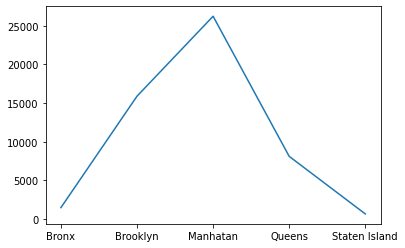

In [27]:
# plotting the lead time with respect to borough

df2 = df_lead_time_with_borough.reset_index()
plt.plot(df2.iloc[:,0], df2.iloc[:,1])
plt.show